# K-Means clusterring | Elbow Method and Silhouette Score

## 1. Import the libraries

In [2]:
# customer segmaentation dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
data= pd.read_csv(r'customer_segmentation.csv')

In [3]:
data.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [7]:
data.shape


(10695, 11)

# Use numerical column data

In [4]:
num_col = ['Age','Work_Experience','Family_Size']
num_col

['Age', 'Work_Experience', 'Family_Size']

In [5]:
# copy of data
df = data[num_col].copy()

In [6]:
df.head(3)

,Age,Work_Experience,Family_Size
0,22,1.0,4.0
1,38,NaN,3.0
2,67,1.0,1.0


# Find the null values

In [15]:
data.shape

(10695, 11)

In [16]:
df.isnull().sum()

Age                   0
Work_Experience    1098
Family_Size         448
dtype: int64

In [17]:
# fill null values

In [18]:
df['Work_Experience']= df['Work_Experience'].fillna(df['Work_Experience'].mean())
df['Family_Size']= df['Family_Size'].fillna(df['Family_Size'].mean())


In [19]:
df.isnull().sum()

Age                0
Work_Experience    0
Family_Size        0
dtype: int64

# Scale the data

In [20]:
from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()


In [21]:
data_scaled=scaler.fit_transform(df)

In [22]:
data_scaled

array([[-1.28249856, -0.50431243,  0.76866935],
       [-0.3286058 ,  0.        ,  0.1037006 ],
       [ 1.40032483, -0.50431243, -1.22623689],
       ...,
       [ 0.56566866,  0.        , -0.56126814],
       [ 0.20795888, -0.50431243,  1.43363809],
       [-0.03051431,  1.98646216,  0.1037006 ]])

# K- Means Clustttering

## Find the optimal number of cluster

In [23]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [24]:
inertia_value = []
silhouette_value = []

K_range = range(2,11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)

    # Inhertia - WCSS
    inertia_value.append(kmeans.inertia_)

    #silhoutte score
    sil_score = silhouette_score(data_scaled,kmeans.labels_)
    silhouette_value.append(sil_score)

In [25]:
inertia_value

[23160.991115946283,
 15368.681132203503,
 11435.917736225825,
 10021.847755002946,
 8853.705354754446,
 8312.670347253315,
 7115.149832250507,
 6625.944334552063,
 6192.979446189427]

In [26]:
silhouette_value

[np.float64(0.2630470868238743),
 np.float64(0.34508017362721854),
 np.float64(0.34951567738153083),
 np.float64(0.3451806029789114),
 np.float64(0.3391997000610652),
 np.float64(0.33170327745398515),
 np.float64(0.32788379127309314),
 np.float64(0.3174747326902811),
 np.float64(0.30336753703128677)]

# Elbow method

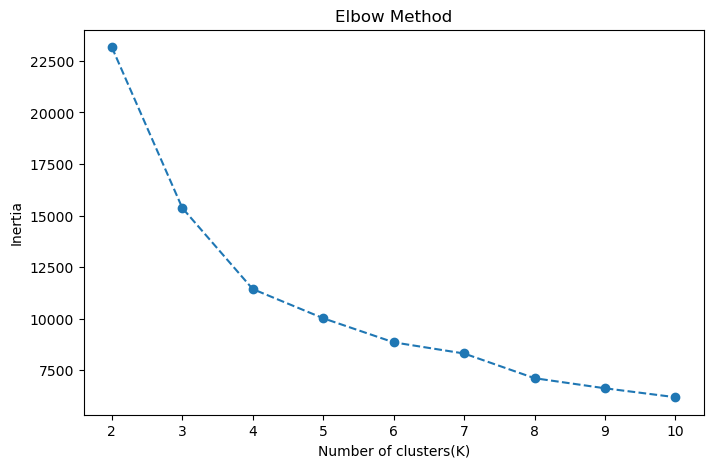

In [31]:
plt.figure(figsize=(8,5))
plt.plot(K_range, inertia_value, marker='o',linestyle='--')

plt.xlabel('Number of clusters(K)')
plt.ylabel('Inertia')

plt.title('Elbow Method')
plt.show()

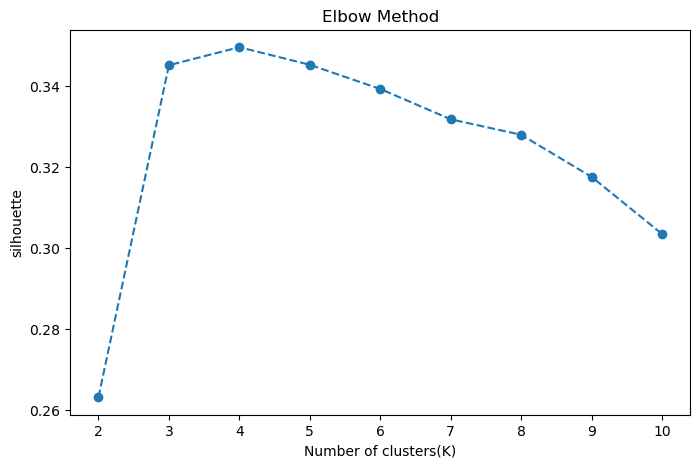

In [32]:
plt.figure(figsize=(8,5))
plt.plot(K_range, silhouette_value, marker='o',linestyle='--')

plt.xlabel('Number of clusters(K)')
plt.ylabel('silhouette')

plt.title('Elbow Method')
plt.show()

In [34]:
print('Optimal Cluster: k= ', 4)

Optimal Cluster: k=  4


# Build K - Means Clustering

In [35]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)

In [37]:
kmeans.fit(data_scaled)

KMeans(n_clusters=4, random_state=42)

# prdeict the cluster

In [38]:
cluster = kmeans.predict(data_scaled)

In [39]:
cluster

array([2, 0, 1, ..., 1, 2, 3], dtype=int32)

In [40]:
df['Cluster']= cluster

In [41]:
df.head()

,Age,Work_Experience,Family_Size,Cluster
0,22,1.000000,4.0,2
1,38,2.619777,3.0,0
2,67,1.000000,1.0,1
3,67,0.000000,2.0,1
4,40,2.619777,6.0,2


In [43]:
df.to_csv('cluset_customer_segmentation.csv')